#**PREPARE DATA**

In [1]:
import pandas as pd, plspm.config as c
from plspm.plspm import Plspm
from plspm.scheme import Scheme
from plspm.mode import Mode
from plspm.bootstrap import Bootstrap

In [2]:
#IMPOR DATA
df = pd.read_csv("[CLEANED-DATA].csv", index_col=0)
df

,SQ1,SQ2,SQ3,SQ4,IQ1,IQ2,IQ3,SAT1,SAT2,SAT3,...,PU1,PU2,PU3,PU4,CI1,CI2,CI3,HM1,HM2,HM3
No,,,,,,,,,,,,,,,,,,,,,
1,5,4,5,4,5,5,4,4,4,4,...,5,4,3,4,4,4,3,4,4,4
2,5,5,5,4,5,5,4,5,5,5,...,5,5,5,5,5,4,5,5,5,5
3,4,5,4,4,4,4,3,4,4,4,...,4,4,4,4,4,4,3,3,3,4
4,4,4,3,4,2,4,4,4,4,3,...,3,4,3,3,4,4,3,4,5,4
5,4,3,4,4,3,3,3,4,3,4,...,4,4,3,5,4,5,3,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,4,5,4,5,4,5,5,4,4,4,...,4,5,4,2,5,5,3,3,3,5
100,3,2,3,3,2,3,3,4,3,4,...,3,2,2,3,4,5,5,4,5,5
101,3,2,2,3,3,4,3,4,5,5,...,3,4,3,4,4,3,3,4,3,3


#**Model Konseptual**
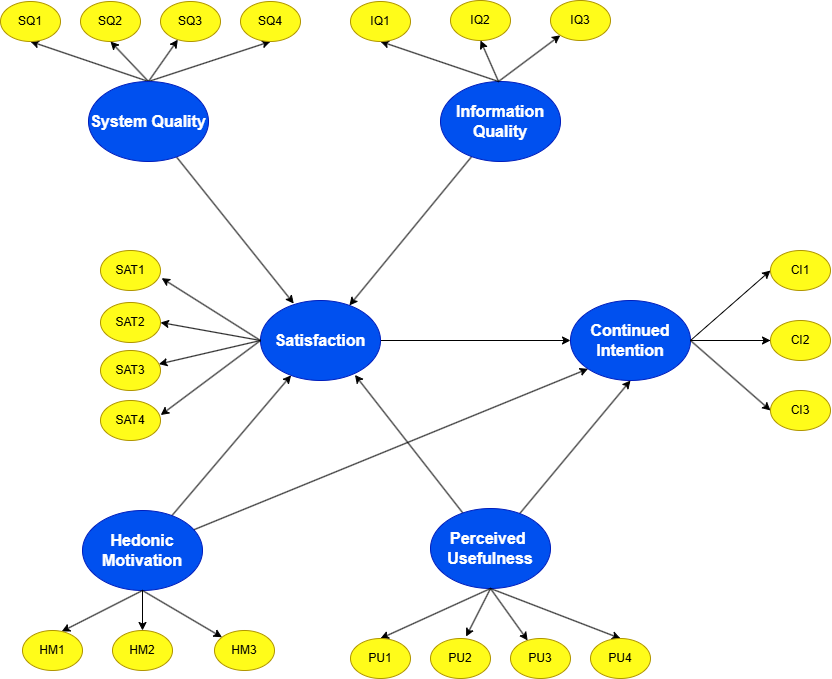

#**MENYUSUN INNER MODEL**

In [3]:
structure = c.Structure()
structure.add_path(["System Quality"], ["Satisfaction"])
structure.add_path(["Information Quality"], ["Satisfaction"])
structure.add_path(["Satisfaction"], ["Continued Intention"])
structure.add_path(["Hedonic Motivation"], ["Satisfaction", "Continued Intention"])
structure.add_path(["Perceived Usefulness"], ["Satisfaction", "Continued Intention"])

#**MENYUSUN OUTER MODEL**

In [4]:
config = c.Config(structure.path(), scaled=False)
config.add_lv_with_columns_named("System Quality", Mode.A, df, "SQ")
config.add_lv_with_columns_named("Information Quality", Mode.A, df, "IQ")
config.add_lv_with_columns_named("Satisfaction", Mode.A, df, "SAT")
config.add_lv_with_columns_named("Hedonic Motivation", Mode.A, df, "HM")
config.add_lv_with_columns_named("Perceived Usefulness", Mode.A, df, "PU")
config.add_lv_with_columns_named("Continued Intention", Mode.A, df, "CI")

#**RUN PLS-PM**

In [5]:
plspm_calc = Plspm(df, config, Scheme.CENTROID)

**Outer Model Assessment**
>**Uji Reliabilitas Indikator**
>>**Indicator Loading & Communality**: Apakah setiap indikator-indikator memiliki hubungan dan reliabilitas yang bagus untuk mengukur setiap konstruk yang dimilikinya? syarat: outer loading ≥ 0,7 & communality test ≥ 0,5

In [6]:
print(plspm_calc.outer_model())

        weight   loading  communality  redundancy
CI1   0.499930  0.888561     0.789541    0.456811
CI2   0.359360  0.672226     0.451888    0.261452
CI3   0.550095  0.839054     0.704012    0.407325
HM1   0.516062  0.871228     0.759037    0.000000
HM2   0.420583  0.809009     0.654495    0.000000
HM3   0.455193  0.736021     0.541727    0.000000
IQ1   0.679703  0.884710     0.782711    0.000000
IQ2   0.492108  0.753136     0.567214    0.000000
IQ3   0.329403  0.600870     0.361045    0.000000
PU1   0.398776  0.819054     0.670850    0.000000
PU2   0.408940  0.854325     0.729871    0.000000
PU3   0.381198  0.804704     0.647548    0.000000
PU4   0.293455  0.653380     0.426905    0.000000
SAT1  0.398852  0.862204     0.743396    0.442761
SAT2  0.402909  0.837345     0.701147    0.417598
SAT3  0.309727  0.727226     0.528857    0.314984
SAT4  0.400410  0.809720     0.655646    0.390498
SQ1   0.431995  0.855215     0.731393    0.000000
SQ2   0.474265  0.853069     0.727726    0.000000


Weight: Bobot yang digunakan untuk membentuk skor konstruk laten dari indikator-indikatornya, weight diperlukan dan dilaporkan jika kamu menggunakan konstruk formatif atau komposit (Mode B).

Redundancy: Ukuran seberapa besar varians indikator yang bisa diprediksi oleh konstruk laten melalui model struktural. Redundancy tidak wajib dilaporkan kecuali melakukan redundancy analysis untuk validasi eksternal konstruk formatif.

> **Uji Reliabilitas Konstruk**
>> **Cronbach's Alpha**: Apakah setiap indikator-indikator mewakili konstruk yang diukurnya dengan baik?
syarat: cronbach's alpha > 0,7

In [11]:
print(plspm_calc.unidimensionality())

                     mode  mvs  cronbach_alpha  dillon_goldstein_rho  \
Perceived Usefulness    A  4.0        0.790999              0.865520   
Hedonic Motivation      A  3.0        0.733989              0.849580   
Information Quality     A  3.0        0.622531              0.799641   
System Quality          A  4.0        0.803138              0.872825   
Satisfaction            A  4.0        0.828660              0.886775   
Continued Intention     A  3.0        0.726417              0.847072   

                       eig_1st   eig_2nd  
Perceived Usefulness  2.476106  0.699519  
Hedonic Motivation    1.960295  0.597526  
Information Quality   1.723218  0.795686  
System Quality        2.539626  0.707187  
Satisfaction          2.651655  0.614710  
Continued Intention   1.952019  0.723678  


Mode: Jenis pengukuran konstruk, Mode A berarti konstruk reflektif dan Mode B berarti konstruk formatif.	

mvs: Jumlah indikator (manifest variables) per konstruk.	

cronbach_alpha	Ukuran reliabilitas internal: seberapa konsisten indikator mengukur konstruk yang sama.	

dillon_goldstein_rho: alternatif Composite Reliability.

eig_1st & eig_2nd: Nilai eigen dari analisis faktor, bersifat opsional, tidak wajib dilaporkan jika fokus ke reliabilitas dasar.

>**Uji Validitas Konvergen**
>>**Average Variance Extracted (AVE)**: Mengukur proporsi varians indikator yang berhasil dijelaskan oleh konstruk laten. syarat: AVE ≥ 0,50

In [12]:
print(plspm_calc.inner_summary())

                            type  r_squared  r_squared_adj  block_communality  \
Continued Intention   Endogenous   0.578577       0.565807           0.648480   
Hedonic Motivation     Exogenous   0.000000       0.000000           0.651753   
Information Quality    Exogenous   0.000000       0.000000           0.570323   
Perceived Usefulness   Exogenous   0.000000       0.000000           0.618794   
Satisfaction          Endogenous   0.595593       0.579086           0.657261   
System Quality         Exogenous   0.000000       0.000000           0.634105   

                      mean_redundancy       ave  
Continued Intention          0.375196  0.648480  
Hedonic Motivation           0.000000  0.651753  
Information Quality          0.000000  0.570323  
Perceived Usefulness         0.000000  0.618794  
Satisfaction                 0.391460  0.657261  
System Quality               0.000000  0.634105  


type: Menunjukkan apakah konstruk bersifat endogen (dipengaruhi oleh konstruk lain) atau eksogen (tidak dipengaruhi oleh konstruk lain).

r_squared: Nilai R² menunjukkan seberapa besar varians konstruk endogen yang dijelaskan oleh konstruk eksogen dalam model.

r_squared_adj: Adjusted R² mengoreksi R² berdasarkan jumlah prediktor, agar tidak bias terhadap model dengan banyak konstruk.

block_communality: Rata-rata communality dari indikator dalam satu konstruk.

mean_redundancy: Rata-rata redundancy dari indikator dalam konstruk.

ave (Average Variance Extracted): Ukuran validitas konvergen: seberapa besar varians indikator yang dijelaskan oleh konstruk dibandingkan dengan error.

>**Uji Validitas Diskriminan**
>> **Cross-loadings**: Apakah indikator-indikator dari setiap konstruk mengukur dengan baik konstruk yang dimilikinya? syarat: nilai cross-loadings suatu indikator-indikator terhadap konstruknya harus lebih tinggi dari nilai cross-loadings terhadap konstruk dari indikator-indikator lainnya.

In [13]:
print(plspm_calc.crossloadings())

      Perceived Usefulness  Hedonic Motivation  Information Quality  \
SQ1               0.538704            0.363330             0.426499   
SQ2               0.524498            0.236594             0.519947   
SQ3               0.467717            0.187116             0.510572   
SQ4               0.347664            0.233243             0.396692   
IQ1               0.563985            0.423437             0.884710   
IQ2               0.621118            0.392379             0.753136   
IQ3               0.163976            0.042168             0.600870   
SAT1              0.587638            0.435463             0.643832   
SAT2              0.710792            0.438853             0.633877   
SAT3              0.514296            0.327823             0.456304   
SAT4              0.440431            0.417705             0.450682   
HM1               0.389492            0.871228             0.354930   
HM2               0.342169            0.809009             0.204155   
HM3   

**Inner Model Assessment**
> Persamaan regresi tiap konstruk endogen

In [14]:
print(plspm_calc.inner_model())

                                                             from  \
index                                                               
Perceived Usefulness -> Satisfaction         Perceived Usefulness   
Hedonic Motivation -> Satisfaction             Hedonic Motivation   
Information Quality -> Satisfaction           Information Quality   
System Quality -> Satisfaction                     System Quality   
Perceived Usefulness -> Continued Intention  Perceived Usefulness   
Hedonic Motivation -> Continued Intention      Hedonic Motivation   
Satisfaction -> Continued Intention                  Satisfaction   

                                                              to  estimate  \
index                                                                        
Perceived Usefulness -> Satisfaction                Satisfaction  0.406795   
Hedonic Motivation -> Satisfaction                  Satisfaction  0.187604   
Information Quality -> Satisfaction                 Satisfaction  

Path Coefficients: Nilai estimasi hubungan antar konstruk laten.

Standard Error: Mengukur variabilitas estimasi path coefficient.

t-value: Statistik uji untuk melihat apakah path coefficient ≠ 0.

p-value: Probabilitas bahwa hasil tersebut terjadi secara kebetulan jika tidak ada hubungan nyata.

> **Koefisien Determinasi (R^2)**: mengukur seberapa besar suatu konstruk endogen bisa dijelaskan oleh konstruk-konstruk lain yang mengarah kepadanya. Syarat: Koefisien Determinasi (R^2) > 0.5 untuk dapat masuk ke dalam kategori sedang/menengah.

In [15]:
print(plspm_calc.inner_summary())

                            type  r_squared  r_squared_adj  block_communality  \
Continued Intention   Endogenous   0.578577       0.565807           0.648480   
Hedonic Motivation     Exogenous   0.000000       0.000000           0.651753   
Information Quality    Exogenous   0.000000       0.000000           0.570323   
Perceived Usefulness   Exogenous   0.000000       0.000000           0.618794   
Satisfaction          Endogenous   0.595593       0.579086           0.657261   
System Quality         Exogenous   0.000000       0.000000           0.634105   

                      mean_redundancy       ave  
Continued Intention          0.375196  0.648480  
Hedonic Motivation           0.000000  0.651753  
Information Quality          0.000000  0.570323  
Perceived Usefulness         0.000000  0.618794  
Satisfaction                 0.391460  0.657261  
System Quality               0.000000  0.634105  


type: Menunjukkan apakah konstruk bersifat endogen (dipengaruhi oleh konstruk lain) atau eksogen (tidak dipengaruhi oleh konstruk lain).

r_squared: Nilai R² menunjukkan seberapa besar varians konstruk endogen yang dijelaskan oleh konstruk eksogen dalam model.

r_squared_adj: Adjusted R² mengoreksi R² berdasarkan jumlah prediktor, agar tidak bias terhadap model dengan banyak konstruk.

block_communality: Rata-rata communality dari indikator dalam satu konstruk.

mean_redundancy: Rata-rata redundancy dari indikator dalam konstruk.

ave (Average Variance Extracted): Ukuran validitas konvergen: seberapa besar varians indikator yang dijelaskan oleh konstruk dibandingkan dengan error.

>**Koefisien Jalur**: Mengukur kekuatan dan arah hubungan antar konstruk laten dalam inner model. Setidaknya diperlukan nilai dalam rentang 0,30 – 0,50 untuk kategori sedang dan arah positif, dan > 0,50 untuk kategori kuat dan arah positif.

In [16]:
print(plspm_calc.path_coefficients())

                      Perceived Usefulness  Hedonic Motivation  \
Perceived Usefulness              0.000000            0.000000   
Hedonic Motivation                0.000000            0.000000   
Information Quality               0.000000            0.000000   
System Quality                    0.000000            0.000000   
Satisfaction                      0.406795            0.187604   
Continued Intention               0.366830            0.265209   

                      Information Quality  System Quality  Satisfaction  \
Perceived Usefulness             0.000000        0.000000      0.000000   
Hedonic Motivation               0.000000        0.000000      0.000000   
Information Quality              0.000000        0.000000      0.000000   
System Quality                   0.000000        0.000000      0.000000   
Satisfaction                     0.384966       -0.076742      0.000000   
Continued Intention              0.000000        0.000000      0.274313   

           

**Pengujian dengan Bootstrapping**
>Bootstrapping dilakukan untuk menghitung signifikansi antar konstruk (pada tingkat signifikansi α = 0.05). syarat: nilai path coefficient positif dan cukup besar, t-stat > 1.96, dan nilai Confidence Intervale (CI) tidak mencakup nol (0), maka pengaruh antar konstruk signifikan. Terdapat 7 hipotesis yang akan diuji sesuai dengan gambar model di atas, yaitu:

>H1: Terdapat pengaruh signifikan System Quality pada Satisfaction pengguna.

>H2: Terdapat pengaruh signifikan Information Quality pada Satisfaction pengguna.

>H3: Terdapat pengaruh signifikan Hedonic Motivation pada Satisfaction pengguna.

>H4: Terdapat pengaruh signifikan Hedonic Motivation pada Continued Intention.

>H5: Terdapat pengaruh signifikan Perceived Usefulness pada Satisfaction pengguna.

>H6: Terdapat pengaruh signifikan Perceived Usefulness pada Continued Intention.

>H7: Terdapat pengaruh signifikan Satisfaction pada Continued Intention.

In [17]:
plspm_calc = Plspm(df, config, bootstrap=True, bootstrap_iterations=5000)

>**Uji Koefisien Jalur**: Didapatkan nilai koefisien jalur dari bootstrap yang dilakukan.

In [18]:
plspm_calc.bootstrap().paths()

,original,mean,std.error,perc.025,perc.975,t stat.
Perceived Usefulness -> Satisfaction,0.406795,0.392811,0.102052,0.175995,0.579840,3.986144
Perceived Usefulness -> Continued Intention,0.366830,0.375763,0.111236,0.160296,0.596448,3.297750
Hedonic Motivation -> Satisfaction,0.187604,0.192751,0.083163,0.045751,0.374281,2.255849
Hedonic Motivation -> Continued Intention,0.265209,0.275882,0.092817,0.090056,0.457722,2.857340
Information Quality -> Satisfaction,0.384966,0.373072,0.097286,0.169520,0.551367,3.957038
System Quality -> Satisfaction,-0.076742,-0.050319,0.121486,-0.288090,0.204580,-0.631697
Satisfaction -> Continued Intention,0.274313,0.256407,0.119283,0.024035,0.483722,2.299695


original: Nilai path coefficient dari model asli (tanpa resampling).

mean: Rata-rata path coefficient dari semua hasil bootstrapping.

std.error: Standar deviasi dari distribusi bootstrapped path coefficients.	Digunakan untuk menghitung t-statistik dan mengukur ketidakpastian estimasi.

perc.025: Nilai percentile ke-2.5 dari distribusi bootstrapped. Ini adalah batas bawah dari 95% confidence interval.

perc.975: Nilai percentile ke-97.5, batas atas dari confidence interval.

t-statistik: Digunakan untuk uji hipotesis: apakah path coefficient ≠ 0. Jika t ≥ 1.96 (α = 0.05), maka signifikan.